# 文本相似度
1.找出各自文章的关键词并合成一个词集合

2.求出两个词集合的并集(词包)

3.计算各自词集的词频并把词频向量化

4.带入向量计算模型就可以求出文本相似度

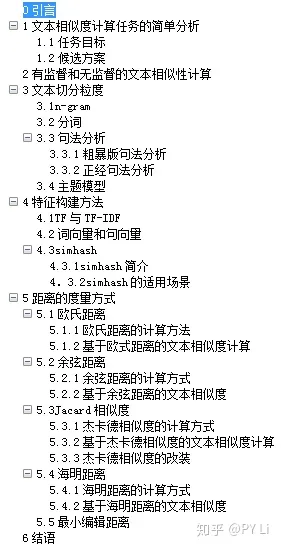

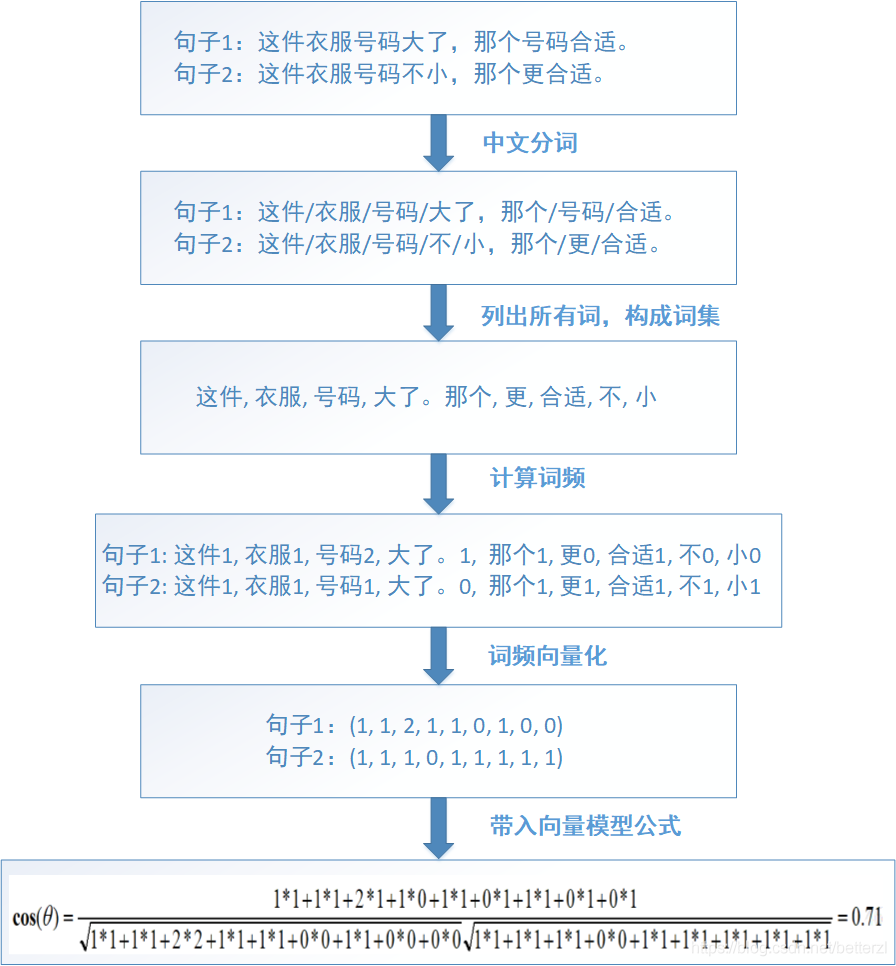

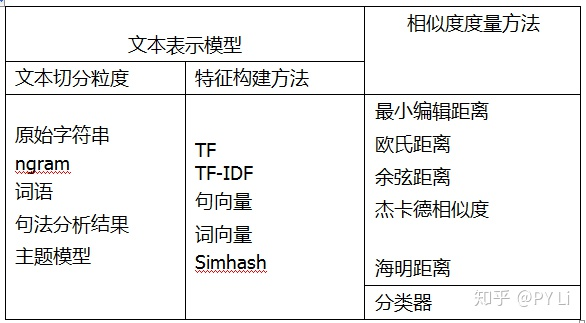

# 编辑距离
编辑距离，又称为Levenshtein距离，是用于计算一个字符串转换为另一个字符串时，插入、删除和替换的次数。例如，将'dad'转换为'bad'需要一次替换操作，编辑距离为1。
nltk.metrics.distance.edit_distance函数实现了编辑距离。


In [3]:
from nltk.metrics.distance import edit_distance
str1 = 'bad'
str2 = 'dad'
print(edit_distance(str1, str2))

1


# masi距离

masi距离度量是jaccard相似度的加权版本，当集合之间存在部分重叠时，通过调整得分来生成小于jaccard距离值。

In [4]:
from nltk.metrics.distance import jaccard_distance,masi_distance
 
#这里我们以单个的字符代表文本
set1 = {'a', 'b', 'c', 'd', 'a'}
set2 = {'a', 'b', 'e', 'g', 'a'}
 
print(jaccard_distance(set1, set2))
print(masi_distance(set1, set2))


0.6666666666666666
0.89


# 余弦相似度

nltk提供了余弦相似性的实现方法，比如有一个词语空间
https://yiyibooks.cn/yiyi/nltk_python/index.html



In [5]:
word_space = ["w1","w2","w3","w4"]
 
text1 = 'w1 w2 w1 w4 w1'
text2 ='w1 w3 w2'
 
#按照word_space位置，计算每个位置词语出现的次数
 
text1_vector = [3,1,0,1]
text2_vector = [1,1,1,0]
#[3,1,0,1]意思是指w1出现了3次，w2出现了1次，w3出现0次，w4出现1次。

#下面看代码，计算text1与text2的余弦相似性

from nltk.cluster.util import cosine_distance
 
text1_vector = [3,1,0,1]
text2_vector = [1,1,1,0]
 
print(cosine_distance(text1_vector,text2_vector))


0.3036893761772086


# N元语法相似度

n元语法只是简单地表示文本中n个标记的所有可能的连续序列。n元语法具体是这样的

In [6]:
import nltk
 
#这里展示2元语法
text1 = 'Chief Executive Officer'
 
#bigram考虑匹配开头和结束，所有使用pad_right和pad_left
ceo_bigrams = nltk.bigrams(text1.split(),pad_right=True,pad_left=True)
 
print(list(ceo_bigrams))
var = [(None, 'Chief'), ('Chief', 'Executive'),
       ('Executive', 'Officer'), ('Officer', None)]
#2元语法相似度计算

import nltk
 
#这里展示2元语法
def bigram_distance(text1, text2):
  #bigram考虑匹配开头和结束，所以使用pad_right和pad_left
  text1_bigrams = nltk.bigrams(text1.split(),pad_right=True,pad_left=True)
   
  text2_bigrams = nltk.bigrams(text2.split(), pad_right=True, pad_left=True)
   
  #交集的长度
  distance = len(set(text1_bigrams).intersection(set(text2_bigrams)))
   
  return distance
 
 
text1 = 'Chief Executive Officer is manager'
 
text2 = 'Chief Technology Officer is technology manager'
 
print(bigram_distance(text1, text2)) #相似度为3


[(None, 'Chief'), ('Chief', 'Executive'), ('Executive', 'Officer'), ('Officer', None)]
3


# jaccard相似性

jaccard距离度量的两个集合的相似度，它是由 （集合1交集合2）/（结合1交结合2）计算而来的。



In [7]:
from nltk.metrics.distance import jaccard_distance
 
#这里我们以单个的字符代表文本
set1 = {'a', 'b', 'c', 'd', 'a'}
set2 = {'a', 'b', 'e', 'g', 'a'}
 
print(jaccard_distance(set1, set2))


0.6666666666666666


# Python实现简单的文本相似度分析操作详解

学习目标：

1.利用gensim包分析文档相似度

2.使用jieba进行中文分词

3.了解TF-IDF模型

环境：

Python 3.6.0 |Anaconda 4.3.1 (64-bit)

工具：

jupyter notebook

注：为了简化问题，本文没有剔除停用词“stop-word”。实际应用中应该要剔除停用词。
首先引入分词API库jieba、文本相似度库gensim


   ### Gensim库

Gensim是一款开源的第三方Python工具包，用于从原始的非结构化的文本中，无监督地学习到文本隐层的主题向量表达。随着自然语言处理的发展，gensim库正变得越来越受欢迎。它是一种用于处理大型文本语料库的Python库，可用于实现各种自然语言处理任务，例如主题建模和相似性分析。
它支持包括TF-IDF，LSA，LDA，和word2vec在内的多种主题模型算法。

gensim库主要用于处理语料库中的文档。它可以自动对文档进行预处理，并将它们转换为向量。
由于文档可以由单词和短语组成，因此gensim库使用了一种称为“词袋”的方法来处理文档。
词袋方法可以将文档表示为一个向量，其中每个单词或短语都有一个相应的权重。这使得可以使用数学算法来计算文档之间的相似度。


相关概念:

    1.语料（Corpus）：一组原始文本的集合，用于无监督地训练文本主题的隐层结构。在Gensim中，Corpus通常是一个可迭代的对象（比如列表）。每一次迭代返回一个可用于表达文本对象的稀疏向量。   
    2.向量（Vector）：由一组文本特征构成的列表。是一段文本在Gensim中的内部表达。在向量空间模型中，每个文档被表示成了一组特征，比如，一个单一的特征可能被视为一个问答对。
    3.稀疏向量（SparseVector）：通常，大部分问题的答案都是0，为了节约空间，我们会从文档表示中省略他们，向量中的每一个元素是一个(key, value)的元组，比如（1,3），（2,4），（5,0），其中（5,0）是一个稀疏向量，在表示是会被忽略。
    4.模型（Model）：是一个抽象的术语。定义了两个向量空间的变换（即从文本的一种向量表达变换为另一种向量表达）。
   
把几个概念组织起来表述：gensim可以通过读取一段语料，输出一个向量，表示文档中的一个词。为了节约空间，通常稀疏的词向量会被忽略，剩下的词向量则可以用来训练各种模型，即从原有的文本表达转向另一种文本表达。



主要的几个方法和函数

dictionary.doc2bow是Gensim中的一个函数，用于将文本转换为词袋模型。它将文本中的每个单词映射到一个唯一的整数ID，并计算每个单词在文本中出现的次数。最终，它返回一个元组列表，其中每个元组包含单词的ID和出现次数。这个函数在文本处理和自然语言处理中非常有用。


In [8]:
import jieba
from gensim import corpora,models,similarities
#以下doc0-doc7是几个最简单的文档，我们可以称之为目标文档，本文就是分析doc_test（测试文档）与以上8个文档的相似度。
doc0 = "我不喜欢上海"
doc1 = "上海是一个好地方"
doc2 = "北京是一个好地方"
doc3 = "上海好吃的在哪里"
doc4 = "上海好玩的在哪里"
doc5 = "上海是好地方"
doc6 = "上海路和上海人"
doc7 = "喜欢小吃"
doc_test="我喜欢上海的小吃"


C:\ProgramData\anaconda3\envs\anaconda\Lib\site-packages\jieba\__init__.py:247: SyntaxWarning: invalid escape sequence '\.'
  re_han, re_skip = re.compile("([\u4E00-\u9FA5a-zA-Z0-9+#&\._]+)", re.U), re.compile("(\r\n|\s)", re.U)
C:\ProgramData\anaconda3\envs\anaconda\Lib\site-packages\jieba\__init__.py:247: SyntaxWarning: invalid escape sequence '\s'
  re_han, re_skip = re.compile("([\u4E00-\u9FA5a-zA-Z0-9+#&\._]+)", re.U), re.compile("(\r\n|\s)", re.U)
C:\ProgramData\anaconda3\envs\anaconda\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [9]:
#分词
#首先，为了简化操作，把目标文档放到一个列表all_doc中。
all_doc = [doc0, doc1, doc2, doc3, doc4, doc5, doc6, doc7]

#以下对目标文档进行分词，并且保存在列表all_doc_list中
all_doc_list = []
for doc in all_doc:
    doc_list= [word for word in jieba.cut(doc)]
    all_doc_list.append(doc_list)

#把分词后形成的列表显示出来：
print(all_doc_list)


Building prefix dict from C:\ProgramData\anaconda3\envs\anaconda\Lib\site-packages\jieba\dict.txt ...
Dumping model to file cache C:\Users\MouKexin\AppData\Local\Temp\jieba.cache
Loading model cost 3.2772061824798584 seconds.
Prefix dict has been built succesfully.


[['我', '不', '喜欢', '上海'], ['上海', '是', '一个', '好', '地方'], ['北京', '是', '一个', '好', '地方'], ['上海', '好吃', '的', '在', '哪里'], ['上海', '好玩', '的', '在', '哪里'], ['上海', '是', '好', '地方'], ['上海', '路', '和', '上海', '人'], ['喜欢', '小吃']]


In [11]:
#以下把测试文档也进行分词，并保存在列表doc_test_list中
doc_test_list = [word for word in jieba.cut(doc_test)]
doc_test_list

['我', '喜欢', '上海', '的', '小吃']

In [12]:
#制作语料库
#首先用dictionary方法获取词袋（bag-of-words)
dictionary = corpora.Dictionary(all_doc_list)
dictionary

In [13]:
#词袋中用数字对所有词进行了编号
dictionary.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [14]:
#编号与词之间的对应关系
var = dictionary.token2id
{'一个': 4,
'上海': 0,
'不': 1,
'人': 14,
'北京': 8,
'和': 15,
'哪里': 9,
'喜欢': 2,
'在': 10,
'地方': 5,
'好': 6,
'好吃': 11,
'好玩': 13,
'小吃': 17,
'我': 3,
'是': 7,
'的': 12,
'路': 16}


{'一个': 4,
 '上海': 0,
 '不': 1,
 '人': 14,
 '北京': 8,
 '和': 15,
 '哪里': 9,
 '喜欢': 2,
 '在': 10,
 '地方': 5,
 '好': 6,
 '好吃': 11,
 '好玩': 13,
 '小吃': 17,
 '我': 3,
 '是': 7,
 '的': 12,
 '路': 16}

In [15]:
#以下使用doc2bow制作语料库
corpus = [dictionary.doc2bow(doc) for doc in all_doc_list]
#语料库如下。语料库是一组向量，向量中的元素是一个二元组（编号、频次数），对应分词后的文档中的每一个词。
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (9, 1), (10, 1), (12, 1), (13, 1)],
 [(0, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 2), (14, 1), (15, 1), (16, 1)],
 [(2, 1), (17, 1)]]

In [16]:
#以下用同样的方法，把测试文档也转换为二元组的向量
doc_test_vec = dictionary.doc2bow(doc_test_list)
doc_test_vec

[(0, 1), (2, 1), (3, 1), (12, 1), (17, 1)]

In [17]:
#相似度分析
#使用TF-IDF模型对语料库建模
tfidf = models.TfidfModel(corpus)
#获取测试文档中，每个词的TF-IDF值
tfidf[doc_test_vec]

[(0, np.float64(0.08112725037593049)),
 (2, np.float64(0.3909393754390612)),
 (3, np.float64(0.5864090631585919)),
 (12, np.float64(0.3909393754390612)),
 (17, np.float64(0.5864090631585919))]

In [18]:
#对每个目标文档，分析测试文档的相似度
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary.keys()))
sim = index[tfidf[doc_test_vec]]
print(index)


In [19]:
#结果
sim

array([0.54680777, 0.01055349, 0.        , 0.17724207, 0.17724207,
       0.01354522, 0.01279765, 0.70477605], dtype=float32)

In [20]:
#根据相似度排序
sorted(enumerate(sim), key=lambda item: -item[1])

[(7, np.float32(0.70477605)),
 (0, np.float32(0.54680777)),
 (3, np.float32(0.17724207)),
 (4, np.float32(0.17724207)),
 (5, np.float32(0.013545224)),
 (6, np.float32(0.01279765)),
 (1, np.float32(0.010553493)),
 (2, np.float32(0.0))]

# 过程拆解


### 1.生成分词列表

对文本集中的文本进行中文分词，返回分词列表，格式如下：
[‘word1’,‘word2’,‘word3’, …]

In [34]:
import jieba
text = '七月七日长生殿，夜半无人私语时。'
words = list(jieba.cut(text))
print(words)

['七月', '七日', '长生殿', '，', '夜半', '无人', '私语', '时', '。']


### 2.基于文本集建立词典，获取特征数
corpora.Dictionary：建立词典

len(dictionary.token2id)：词典中词的个数

In [35]:
from gensim import corpora
import jieba
# 文本集
text1 = '坚果果实'
text2 = '坚果实在好吃'
texts = [text1, text2]

# 将文本集生成分词列表
texts = [list(jieba.cut(text)) for text in texts]
print('文本集：', texts)

# 基于文本集建立词典
dictionary = corpora.Dictionary(texts)
print('词典：', dictionary)

# 提取词典特征数
feature_cnt = len(dictionary.token2id)
print('词典特征数：%d' % feature_cnt)

文本集： [['坚果', '果实'], ['坚果', '实在', '好吃']]
词典： Dictionary<4 unique tokens: ['坚果', '果实', '好吃', '实在']>
词典特征数：4


In [36]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

### 3.基于词典建立语料库
语料库即存放稀疏向量的列表

In [38]:
from gensim import corpora
import jieba
text1 = '南方天气天气温暖潮湿'
text2 = '北方天气寒冷干燥'
texts = [text1, text2]
texts = [list(jieba.cut(text)) for text in texts]
dictionary = corpora.Dictionary(texts)
print('词典（字典）：', dictionary.token2id)


# 基于词典建立新的【语料库】
corpus = [dictionary.doc2bow(text) for text in texts]
print('语料库：', corpus)

#打印结果


词典（字典）： {'南方': 0, '天气': 1, '温暖': 2, '潮湿': 3, '北方': 4, '寒冷': 5, '干燥': 6}
语料库： [[(0, 1), (1, 2), (2, 1), (3, 1)], [(1, 1), (4, 1), (5, 1), (6, 1)]]


#doc2bow函数

    1、将所有单词取【集合】，并对每个单词分配一个ID号
    以 ['东京', '啊', '东京', '啊', '东京']为例
    对单词分配ID： 东京→ 0； 啊→ 4
    变成： [0, 4, 0, 4, 0]

    2、转换成 稀疏向量
    0有 3个，即表示为( 0, 3)
    4有 2个，即表示为( 4, 2)
    最终结果：[( 0, 3), ( 4, 2)]


In [42]:
#搜索词也转成稀疏向量
from gensim import corpora
import jieba
text1 = '南方天气温暖潮湿'
text2 = '北方天气寒冷干燥'
texts = [text1, text2]
texts = [list(jieba.cut(text)) for text in texts]
dictionary = corpora.Dictionary(texts)

# 用【词典】把【搜索词】也转换为【稀疏向量】
keyword = '天气'
kw_vector = dictionary.doc2bow(jieba.cut(keyword))
print(kw_vector)


[(1, 1)]


### 4. 用语料库训练TF-IDF模型

In [44]:

#TF-IDF是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度

from gensim import corpora, models, similarities
import jieba
text1 = '你南方天气温暖潮湿'
text2 = '北方天气寒冷干燥'
texts = [text1, text2]
texts = [list(jieba.cut(text)) for text in texts]
dictionary = corpora.Dictionary(texts)
feature_cnt = len(dictionary.token2id.keys())
corpus = [dictionary.doc2bow(text) for text in texts]
print('词典（字典）：', dictionary.token2id)
print(corpus)

# 用语料库来训练TF-IDF模型
tfidf = models.TfidfModel(corpus)
print(tfidf)

#TfidfModel(num_docs=2, num_nnz=8) 文档数量 以及文档集合中不重复词的数量

词典（字典）： {'你': 0, '南方': 1, '天气': 2, '温暖': 3, '潮湿': 4, '北方': 5, '寒冷': 6, '干燥': 7}
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(2, 1), (5, 1), (6, 1), (7, 1)]]
TfidfModel<num_docs=2, num_nnz=9>


In [45]:
for x in tfidf[corpus]:
    print(x)

## 备注
#如果某个词不出现，那是因为gensim具有去除停用词的功能。
#另外一点，不管是基于频次的，还是基于TF-IDF的，所有频次为0，或者TF-IDF值为0的不会出现。因为我们知道，词袋模型的一大缺点，就是高维稀疏向量，因此为了节省空间，只会将非零元素用tuple表示出来。

[(0, np.float64(0.5)), (1, np.float64(0.5)), (3, np.float64(0.5)), (4, np.float64(0.5))]
[(5, np.float64(0.5773502691896258)), (6, np.float64(0.5773502691896258)), (7, np.float64(0.5773502691896258))]


### 5.相似度计算

In [47]:

from gensim import corpora, models, similarities
import jieba
text1 = '南方天气温暖潮湿'
text2 = '北方天气寒冷干燥'
texts = [text1, text2]
keyword = '南方潮湿'


texts = [list(jieba.cut(text)) for text in texts]
dictionary = corpora.Dictionary(texts)
num_features = len(dictionary.token2id)
print(num_features)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)

new_vec = dictionary.doc2bow(jieba.cut(keyword))

# 相似度计算,# 稀疏矩阵相似度 将主语料库corpus的训练结果作为初始值
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features)
print('\nTF-IDF模型的稀疏向量集：')
for i in tfidf[corpus]:
    print(i)

print('\nTF-IDF模型的keyword稀疏向量：')
print(tfidf[new_vec])  


7

TF-IDF模型的稀疏向量集：
[(0, np.float64(0.5773502691896258)), (2, np.float64(0.5773502691896258)), (3, np.float64(0.5773502691896258))]
[(4, np.float64(0.5773502691896258)), (5, np.float64(0.5773502691896258)), (6, np.float64(0.5773502691896258))]

TF-IDF模型的keyword稀疏向量：
[(0, np.float64(0.7071067811865475)), (3, np.float64(0.7071067811865475))]


In [48]:
print(index.index)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 6 stored elements and shape (2, 7)>
  Coords	Values
  (0, 0)	0.5773502588272095
  (0, 2)	0.5773502588272095
  (0, 3)	0.5773502588272095
  (1, 4)	0.5773502588272095
  (1, 5)	0.5773502588272095
  (1, 6)	0.5773502588272095


In [49]:
sim = index[tfidf[corpus]] # 相当于sim = index.get_similarities(tfidf[doc_text_vec]）
print(sim)

[[0.99999994 0.        ]
 [0.         0.99999994]]


In [50]:
print('\n相似度计算：')#将语料库new_vec在语料库corpus的训练结果中的向量表示与语料库corpus的向量表示做矩阵相似度计算
sim = index[tfidf[new_vec]] # 相当于sim = index.get_similarities(tfidf[new_vec]）

for i in range(len(sim)):
    print('第', i+1, '句话的相似度为：', sim[i])



相似度计算：
第 1 句话的相似度为： 0.81649655
第 2 句话的相似度为： 0.0


 # 过程总结：
从分析结果来看，测试文档与doc7相似度最高，其次是doc0，与doc2的相似度为零。大家可以根据TF-IDF的原理，看看是否符合预期。
最后总结一下文本相似度分析的步骤：
1、读取文档

2、对要计算的多篇文档进行分词

3、对文档进行整理成指定格式，方便后续进行计算

4、计算出词语的词频

5、【可选】对词频低的词语进行过滤

6、建立语料库词典

7、加载要对比的文档

8、将要对比的文档通过doc2bow转化为词袋模型

9、对词袋模型进行进一步处理，得到新语料库

10、将新语料库通过tfidfmodel进行处理，得到tfidf

11、通过token2id得到特征数

12、稀疏矩阵相似度，从而建立索引

13、得到最终相似度结果


In [ ]:
from gensim import corpora,models,similarities
import jieba
from collections import defaultdict
#  1.读取文档
doc1 = "F:/result/1.txt"
doc2 = "F:/result/3.txt"
d1 = open(doc1,encoding="utf-8").read()
d2 = open(doc2,encoding="utf-8").read()

#  2.对要计算的多篇文档进行分词
data1 = list(jieba.cut(d1))
data2 = list(jieba.cut(d2))

#   3.对文档进行整理成指定格式，方便后续计算  
#用累加的方式遍历   
data11 = ""
for item in data1:
    data11+=item+" "

data22 = ""
for item in data2:
    data22+=item+" "
documents = [data11,data22]

#  4.计算出词语的频率
texts = [[word for word in document.split()]
        for document in documents]
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token]+=1

#  5.对可选、低频词进行过滤
texts = [[word for word in text if frequency[token]>1000]
 for text in texts]              #从右往左读

#  6.通过语料库建立词典
dictionary = corpora.Dictionary(texts)
dictionary.save("F:/result/wenben3.txt")

#  7.加载要对比的文档
doc3 = "F:/result/4.txt"
d3 = open(doc3,encoding="utf-8").read()

#  8.将要对比的文档通过doc2bow转化为稀疏向量
data3 = jieba.cut(d3)
data33 = ""
for item in data3:
    data33+=item+""
new_doc = data33
new_vec = dictionary.doc2bow(new_doc.split())  #  得到稀疏向量
corpus = [dictionary.doc2bow(text) for text in texts]

#  10.通过TF-idf模型对新语料库处理，得到tfidf
tfidf = models.TfidfModel(corpus)

#  11.通过token2id得到特征数
featureNum = len(dictionary.token2id.keys())

#  12.计算稀疏矩阵相似度，从而建立索引
index = similarities.SparseMatrixSimilarity(tfidf[corpus],num_features=featureNum)
sim = index[tfidf[new_vec]]
print(sim)


# 补充：利用Sklearn计算相似文章
余弦相似度在计算文本相似度等问题中有着广泛的应用，scikit-learn中提供了方便的调用方法

### 第一种
使用cosine_similarity，传入一个变量a时，返回数组的第i行第j列表示a[i]与a[j]的余弦相似度
例：

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

a=[[1,3,2],[2,2,1]]
cosine_similarity(a)


array([[1.        , 0.89087081],
       [0.89087081, 1.        ]])

### 第二种

使用pairwise_distances，注意该方法返回的是余弦距离，余弦距离= 1 - 余弦相似度，同样传入一个变量a时，返回数组的第i行第j列表示a[i]与a[j]的余弦距离
例：

In [55]:
from sklearn.metrics.pairwise import pairwise_distances

pairwise_distances(a,metric="cosine")
# array([[0. , 0.10912919],[0.10912919, 0. ]])

array([[0.        , 0.10912919],
       [0.10912919, 0.        ]])

函数说明：

cosing_similarity(array) 输入的样本为array格式，为经过词袋模型编码以后的向量化特征，用于计算两两样本之间的相关性
当我们使用词频或者TFidf构造出词袋模型，并对每一个文章内容做词统计以后，

我们如果要判断两个文章内容的相关性，这时候我们需要对数字映射后的特征做一个余弦相似度的匹配：即a.dot(b) / sqrt(a^2 + b^2)

在sklearn中使用metrics.pairwise import cosine_similarity

第一步: 对数据使用DataFrame化，并进行数组化

第二步：对数据进行分词，并去除停用词，使用’ '.join连接列表

第三步：np.vectorizer向量化函数，调用函数进行分词和停用词的去除

第四步：使用TF-idf词袋模型，对特征进行向量化数字映射

第五步：使用 from sklearn.metrics.pairwise import cosine_similarity， 对两两样本之间做相关性矩阵，使用的是余弦相似度计算公式


In [56]:
import pandas as pd
import numpy as np
import re
import nltk #pip install nltk

nltk.download('stopwords')
corpus = ['The sky is blue and beautiful.',
'Love this blue and beautiful sky!',
'The quick brown fox jumps over the lazy dog.',
'The brown fox is quick and the blue dog is lazy!',
'The sky is very blue and the sky is very beautiful today',
'The dog is lazy but the brown fox is quick!'
]

labels = ['weather', 'weather', 'animals', 'animals', 'weather', 'animals']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MouKexin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [57]:
#第一步：构建DataFrame格式数据
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'categoray': labels})
corpus_df

,Document,categoray
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,The brown fox is quick and the blue dog is lazy!,animals
4,The sky is very blue and the sky is very beaut...,weather
5,The dog is lazy but the brown fox is quick!,animals


In [59]:
#第二步：构建函数进行分词和停用词的去除,
#载入英文的停用词表
stopwords = nltk.corpus.stopwords.words('english')

#建立词分割模型
cut_model = nltk.WordPunctTokenizer()

#定义分词和停用词去除的函数
def Normalize_corpus(doc):
# 去除字符串中结尾的标点符号
    doc = re.sub(r'[^a-zA-Z0-9\s]','',doc)
# 是字符串变小写格式
    doc = doc.lower()
# 去除字符串两边的空格
    doc = doc.strip()
# 进行分词操作
    tokens = cut_model.tokenize(doc)
# 使用停止用词表去除停用词
    doc = [token for token in tokens if token not in stopwords]
# 将去除停用词后的字符串使用' '连接，为了接下来的词袋模型做准备
    doc = " ".join(doc)
    return doc

##第三步：向量化函数和调用函数
#向量化函数,当输入一个列表时，列表里的数将被一个一个输入，最后返回也是一个个列表的输出
Normalize_corpus = np.vectorize(Normalize_corpus)

# 调用函数进行分词和去除停用词
corpus_norm = Normalize_corpus(corpus)

In [60]:
##第四步：使用TfidVectorizer进行TF-idf词袋模型的构建
from sklearn.feature_extraction.text import TfidfVectorizer

Tf = TfidfVectorizer(use_idf=True)
Tf.fit(corpus_norm)
vocs = Tf.get_feature_names_out()
corpus_array = Tf.transform(corpus_norm).toarray()
corpus_norm_df = pd.DataFrame(corpus_array, columns=vocs)
print(corpus_norm_df.head())

   beautiful      blue     brown       dog       fox     jumps      lazy  \
0   0.604749  0.518224  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.455454  0.390289  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.375653  0.375653  0.375653  0.542607  0.375653   
3   0.000000  0.357850  0.417599  0.417599  0.417599  0.000000  0.417599   
4   0.357583  0.306421  0.000000  0.000000  0.000000  0.000000  0.000000   

       love     quick       sky     today  
0  0.000000  0.000000  0.604749  0.000000  
1  0.657873  0.000000  0.455454  0.000000  
2  0.000000  0.375653  0.000000  0.000000  
3  0.000000  0.417599  0.000000  0.000000  
4  0.000000  0.000000  0.715166  0.516505  


In [61]:
#第五步：使用 from sklearn.metrics.pairwise import cosine_similarity， 对两两样本之间做相关性矩阵，使用的是余弦相似度计算公式
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(corpus_array)
similarity_matrix_df = pd.DataFrame(similarity_matrix)
print(similarity_matrix_df)

          0         1         2         3         4         5
0  1.000000  0.753128  0.000000  0.185447  0.807539  0.000000
1  0.753128  1.000000  0.000000  0.139665  0.608181  0.000000
2  0.000000  0.000000  1.000000  0.784362  0.000000  0.839987
3  0.185447  0.139665  0.784362  1.000000  0.109653  0.933779
4  0.807539  0.608181  0.000000  0.109653  1.000000  0.000000
5  0.000000  0.000000  0.839987  0.933779  0.000000  1.000000


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_text_similarity(texts):
    """
    计算文本列表中所有文本两两之间的余弦相似度
    
    参数:
        texts: 文本列表，如 ["文本1", "文本2", "文本3"]
    
    返回:
        相似度矩阵（二维数组），similarity[i][j] 表示第i个文本与第j个文本的相似度
    """
    # 1. 初始化TF-IDF向量器，将文本转化为向量
    vectorizer = TfidfVectorizer(
        stop_words="english",  # 英文停用词（如"the"、"is"），中文可替换为自定义停用词表
        token_pattern=r"\b\w+\b"  # 分词规则（匹配单词）\b\w+\b 会精准匹配由字母、数字、下划线组成的完整单词，且不包含单词前后的空格、标点等非单词字符。
    )
    
    # 2. 拟合文本并转化为TF-IDF矩阵（每行是一个文本的向量）
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # 3. 计算余弦相似度（返回n×n矩阵，n为文本数量）
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    return similarity_matrix

# 示例使用
if __name__ == "__main__":
    # 待比较的文本列表（可替换为中文文本）
    texts = [
        "The quick brown fox jumps over the lazy dog",
        "A fast brown fox leaps over a sleepy dog",
        "I like eating apples and bananas",
        "She enjoys consuming fruits like apples"
    ]
    
    # 计算相似度矩阵
    similarities = calculate_text_similarity(texts)
    
    # 打印结果（保留4位小数）
    print("文本相似度矩阵：")
    for i in range(len(texts)):
        for j in range(len(texts)):
            print(f"{similarities[i][j]:.4f}", end="\t")
        print()  # 换行

文本相似度矩阵：
1.0000	0.3833	0.0000	0.0000	
0.3833	1.0000	0.0000	0.0000	
0.0000	0.0000	1.0000	0.3351	
0.0000	0.0000	0.3351	1.0000	
